In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [4]:
# Define paths
data_dir = 'tomato'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

In [5]:
# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

# # Data Augmentation and Preprocessing
# data_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# Data Augmentation and Preprocessing
data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5,  # Split validation into val/test (50% each)
)

# Train Data
train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation Data
val_data = data_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Validation set (used during training)
)

# Test Data
test_data = data_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Test set (used for final evaluation)
)

Found 10000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [6]:
# Define CNN Model
cnn_model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
print("Training CNN Model...")
cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=EPOCHS)


C:\Users\viraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN Model...
Epoch 1/20


C:\Users\viraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 460ms/step - accuracy: 0.2152 - loss: 56.6469 - val_accuracy: 0.1920 - val_loss: 2.1884
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 462ms/step - accuracy: 0.4118 - loss: 1.7877 - val_accuracy: 0.3400 - val_loss: 2.0048
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 471ms/step - accuracy: 0.6737 - loss: 1.0295 - val_accuracy: 0.3400 - val_loss: 1.9680
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 470ms/step - accuracy: 0.8702 - loss: 0.4423 - val_accuracy: 0.3680 - val_loss: 2.3329
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 471ms/step - accuracy: 0.9419 - loss: 0.2067 - val_accuracy: 0.3620 - val_loss: 3.6707
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 470ms/step - accuracy: 0.9851 - loss: 0.0651 - val_accuracy: 0.3420 - val_loss: 4.1496
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 470ms/step - accuracy: 0.9820 - loss: 0.0722 - val_accuracy: 0.3720 - val_loss: 3.8632
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 148s 471ms/step - accuracy: 0.9779 - loss: 0.0

In [7]:
# Define ResNet50 Model
resnet_model = Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])
resnet_model.layers[0].trainable = False  # Freeze ResNet50 base
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet50 Model
print("Training ResNet50 Model...")
resnet_history = resnet_model.fit(train_data, validation_data=val_data, epochs=EPOCHS)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training ResNet50 Model...
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 199s 622ms/step - accuracy: 0.6526 - loss: 1.0758 - val_accuracy: 0.9100 - val_loss: 0.2865
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 619ms/step - accuracy: 0.8945 - loss: 0.3151 - val_accuracy: 0.9240 - val_loss: 0.2684
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 196s 627ms/step - accuracy: 0.9154 - loss: 0.2466 - val_accuracy: 0.9240 - val_loss: 0.2086
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 623ms/step - accuracy: 0.9285 - loss: 0.2035 - val_accuracy: 0.9200 - val_loss: 0.2493
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 632ms/step - accuracy: 0.9432 - loss: 0.1564 - val_accuracy: 0.9360 - val_loss: 0.1789
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 623ms/step - accuracy: 0.9539 - loss: 0.1326 - val_accuracy: 0.9200 - val_loss: 0.2141
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 196s 625ms/step - accuracy: 0.9513 - loss: 0.1437 - val_accuracy: 0.9400 - val_loss: 0.183

In [8]:
# Evaluate Models
print("Evaluating CNN Model on Test Data...")
cnn_eval = cnn_model.evaluate(test_data)
print(f"CNN Test Accuracy: {cnn_eval[1]:.2f}")

print("Evaluating ResNet50 Model on Test Data...")
resnet_eval = resnet_model.evaluate(test_data)
print(f"ResNet50 Test Accuracy: {resnet_eval[1]:.2f}")

Evaluating CNN Model on Test Data...
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3677 - loss: 7.2973
CNN Test Accuracy: 0.38
Evaluating ResNet50 Model on Test Data...
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 587ms/step - accuracy: 0.9718 - loss: 0.0775
ResNet50 Test Accuracy: 0.96


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Confusion Matrix for CNN:
[[ 7  3  5  6  4  8  4  1  5  7]
 [ 7  5  3  7  4 11  1  4  4  4]
 [ 2  7  5  6  5  8  3  5  5  4]
 [ 5  4  4  4  7 10  0  2  6  8]
 [ 5  6  2  6  8  6  4  5  6  2]
 [ 4  4  3  2  6 10  3  8  7  3]
 [ 7  4  2  7  4  8  2  3  8  5]
 [ 4  3  4  3  4 11  7  4  5  5]
 [ 7  3  2  8  5  8  2  4  4  7]
 [ 4  3  4  3  5 12  5  5  3  6]]


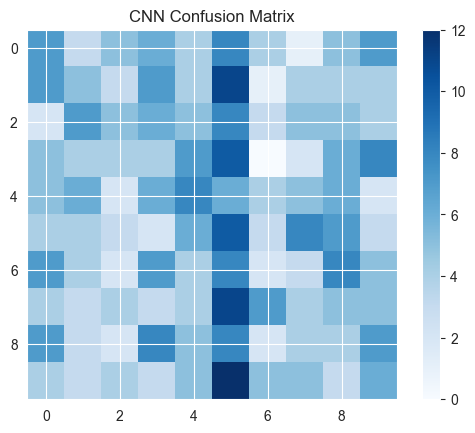

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 724ms/step
Confusion Matrix for ResNet50:
[[ 7  5  2  6 11  3  2  4  6  4]
 [ 5  9  6  4  2  3  3  7  6  5]
 [10  1  7  3  3  8  5  2  2  9]
 [ 6  4  2  7  7  9  5  2  6  2]
 [ 5  2 12  6  2  8  5  5  3  2]
 [ 3  2  7  6  5  6  2  9  5  5]
 [ 2  7  5  4  5  3  7  3  6  8]
 [ 4  6  3  7  7  5  6  4  2  6]
 [ 5  4  3  4  5  4  5  6  9  5]
 [ 5  5  7  3  2  6  5  7  4  6]]


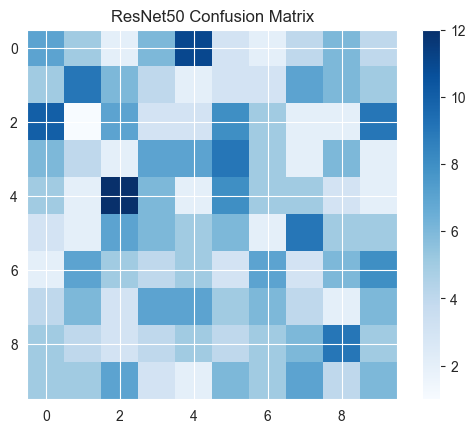

In [9]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    plt.show()

# CNN Confusion Matrix
y_true = test_data.classes
y_pred_cnn = np.argmax(cnn_model.predict(test_data), axis=1)
plot_confusion_matrix(y_true, y_pred_cnn, "CNN")

# ResNet50 Confusion Matrix
y_pred_resnet = np.argmax(resnet_model.predict(test_data), axis=1)
plot_confusion_matrix(y_true, y_pred_resnet, "ResNet50")


In [10]:
# ROC-AUC Curve
def plot_roc_auc(model, data, model_name):
    y_true = data.classes
    y_pred_prob = model.predict(data)
    y_true_oh = label_binarize(y_true, classes=list(range(data.num_classes)))
    roc_auc = roc_auc_score(y_true_oh, y_pred_prob, multi_class='ovr')
    print(f"ROC-AUC Score for {model_name}: {roc_auc:.2f}")

# ROC-AUC for CNN
plot_roc_auc(cnn_model, test_data, "CNN")

# ROC-AUC for ResNet50
plot_roc_auc(resnet_model, test_data, "ResNet50")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
ROC-AUC Score for CNN: 0.50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 602ms/step
ROC-AUC Score for ResNet50: 0.50
